# Convolutional Neural Network

### Installing the libraries

## Importing The Libraries

In [213]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image as img
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [184]:
tf.__version__

'2.2.0'

In [185]:
cv2.__version__

'4.2.0'

# Analising the Data

In [214]:
X = []
y = []
IMG_SIZE = 150
DIR = "111880_269359_bundle_archive/seg_train/seg_train"
folders = os.listdir(DIR)
folders

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [216]:
for i, file in enumerate(folders):
    filename = os.path.join(DIR, file)
    print("Folder {} started".format(file))
    try:
        for img in os.listdir(filename):
            path = os.path.join(filename, img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            y.append(i)
    except:
        print("File {} not read".format(path))
        
    print("Folder {} done".format(file))
    print("The folder {} is labeled as {}".format(file, i))

Folder buildings started
Folder buildings done
The folder buildings is labeled as 0
Folder forest started
Folder forest done
The folder forest is labeled as 1
Folder glacier started
Folder glacier done
The folder glacier is labeled as 2
Folder mountain started
Folder mountain done
The folder mountain is labeled as 3
Folder sea started
Folder sea done
The folder sea is labeled as 4
Folder street started
Folder street done
The folder street is labeled as 5


In [217]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([2191, 2271, 2404, 2512, 2274, 2382], dtype=int64))

### Making the functions to get the training and validation set from the Images

In [223]:
from tqdm import tqdm
X=[]
Z=[]

IMG_SIZE=150
IMAGE_BUILDINGS_DIR='111880_269359_bundle_archive/seg_train/seg_train/buildings'
IMAGE_FOREST_DIR='111880_269359_bundle_archive/seg_train/seg_train/forest'
IMAGE_GLACIER_DIR='111880_269359_bundle_archive/seg_train/seg_train/glacier'
IMAGE_MOUNTAIN_DIR='111880_269359_bundle_archive/seg_train/seg_train/mountain'
IMAGE_SEA_DIR='111880_269359_bundle_archive/seg_train/seg_train/sea'
IMAGE_STREET_DIR='111880_269359_bundle_archive/seg_train/seg_train/street'

In [224]:
def assign_label(img,image_type):
    return image_type

In [255]:
def make_train_data(image_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,image_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(__builtins__.str(label))

In [256]:
make_train_data('Buildings',IMAGE_BUILDINGS_DIR)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████| 2191/2191 [00:02<00:00, 976.38it/s]


16226


In [257]:
make_train_data('Forest',IMAGE_FOREST_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████| 2271/2271 [00:02<00:00, 1022.05it/s]


18497


In [258]:
make_train_data('Glacier',IMAGE_GLACIER_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████| 2404/2404 [00:02<00:00, 1115.03it/s]


20901


In [259]:
make_train_data('Mountain',IMAGE_MOUNTAIN_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████| 2512/2512 [00:02<00:00, 1253.49it/s]


23413


In [260]:
make_train_data('Sea',IMAGE_SEA_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████| 2274/2274 [00:01<00:00, 1327.50it/s]


25687


In [261]:
make_train_data('Street',IMAGE_STREET_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:02<00:00, 1121.99it/s]


28069


In [262]:

from IPython.display import display
from PIL import Image 
labels = []
dic = dict()
for i in range(0,6):
    str = '111880_269359_bundle_archive\seg_train\seg_train\\'+dirs[i]
    count = 0
    for j in os.listdir(str):
        str2 = str+"\\"+j
        im = Image.open(str2)
        count += 1
        labels.append(j)
    dic[dirs[i]] = count

In [263]:
labels1 = []
dic1 = dict()
IMAGE_SIZE = (64,64)
for i in range(0,6):
    str = '111880_269359_bundle_archive\seg_test\seg_test\\'+dirs[i]
    count = 0
    for j in os.listdir(str):
        str2 = str+"\\"+j
        im = Image.open(str2)
        count += 1
        labels1.append(j)
    dic1[dirs[i]] = count

In [264]:
print ("Number of training examples: {}".format(len(labels)))
print ("Number of testing examples: {}".format(len(labels1)))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (64, 64)


In [265]:
lis1 = []
lis2 = []
for key,val in dic.items():
    lis1.append(val)
    lis2.append(key)

In [266]:
lis11 = []
lis22 = []
for key,val in dic1.items():
    lis11.append(val)
    lis22.append(key)

In [267]:
data = {'Name':lis2, 'train':lis1,'test':lis11}
data

{'Name': ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
 'train': [2191, 2271, 2404, 2512, 2274, 2382],
 'test': [437, 474, 553, 525, 510, 501]}

In [268]:
import pandas as pd
df = pd.DataFrame(data)
df

,Name,train,test
0,buildings,2191,437
1,forest,2271,474
2,glacier,2404,553
3,mountain,2512,525
4,sea,2274,510
5,street,2382,501


## 2.2 ) Visualizing some Random Images

Text(0.5, 1.0, 'Training sets Input')

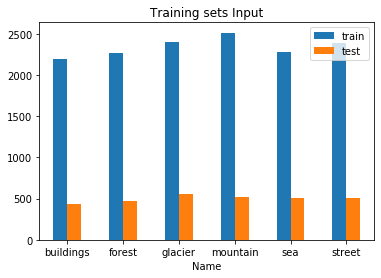

In [269]:
ax = df.plot.bar(x='Name', y=['train','test'], rot=0)
plt.title('Training sets Input')

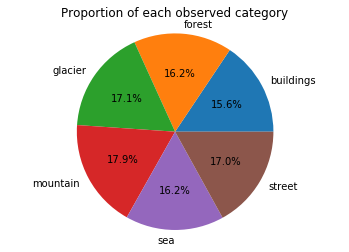

In [270]:
plt.pie(lis1,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=lis2,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

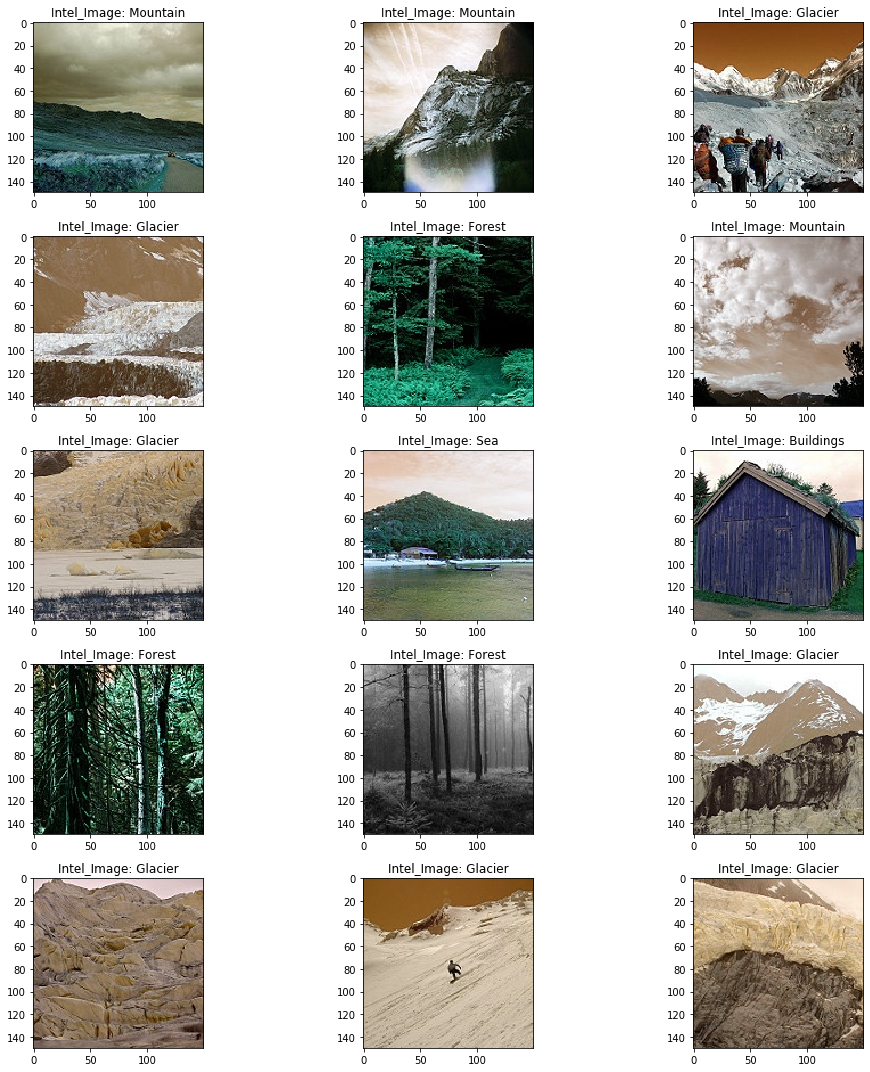

In [271]:
import random as rn
fig,ax=plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (3):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Intel_Image: '+Z[l])
        
plt.tight_layout()

### Preprocessing the Training set

In [272]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
seg_train = train_datagen.flow_from_directory('111880_269359_bundle_archive/seg_train/seg_train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


### Preprocessing the Test set

In [273]:
test_datagen = ImageDataGenerator(rescale = 1./255)
seg_test = test_datagen.flow_from_directory('111880_269359_bundle_archive/seg_test/seg_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')
IMAGE_SIZE = (64,64)

Found 3000 images belonging to 6 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [281]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [282]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [283]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [284]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [285]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [286]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [287]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

In [288]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

## Part 3 - Training the CNN

### Compiling the CNN

In [289]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [290]:
trained= cnn.fit(x = seg_train, validation_data = seg_test, epochs = 25)

Epoch 1/25


186/439 [===========>..................] - ETA: 0s - loss: 1.7842 - accuracy: 0.21 - ETA: 34s - loss: 1.8407 - accuracy: 0.218 - ETA: 1:09 - loss: 1.8057 - accuracy: 0.23 - ETA: 1:30 - loss: 1.7800 - accuracy: 0.23 - ETA: 1:44 - loss: 1.7666 - accuracy: 0.22 - ETA: 1:43 - loss: 1.7553 - accuracy: 0.23 - ETA: 1:40 - loss: 1.7328 - accuracy: 0.27 - ETA: 1:37 - loss: 1.7219 - accuracy: 0.27 - ETA: 1:35 - loss: 1.7024 - accuracy: 0.29 - ETA: 1:34 - loss: 1.6985 - accuracy: 0.29 - ETA: 1:32 - loss: 1.6837 - accuracy: 0.29 - ETA: 1:31 - loss: 1.6645 - accuracy: 0.31 - ETA: 1:30 - loss: 1.6607 - accuracy: 0.31 - ETA: 1:29 - loss: 1.6355 - accuracy: 0.32 - ETA: 1:31 - loss: 1.6151 - accuracy: 0.33 - ETA: 1:30 - loss: 1.5998 - accuracy: 0.33 - ETA: 1:29 - loss: 1.5885 - accuracy: 0.34 - ETA: 1:28 - loss: 1.5915 - accuracy: 0.33 - ETA: 1:28 - loss: 1.5776 - accuracy: 0.34 - ETA: 1:27 - loss: 1.5683 - accuracy: 0.34 - ETA: 1:28 - loss: 1.5686 - accuracy: 0.34 - ETA: 1:27 - loss: 1.5561 - accuracy

439/439 [==============================] - ETA: 13s - loss: 1.0171 - accuracy: 0.604 - ETA: 13s - loss: 1.0164 - accuracy: 0.605 - ETA: 13s - loss: 1.0158 - accuracy: 0.605 - ETA: 12s - loss: 1.0159 - accuracy: 0.605 - ETA: 12s - loss: 1.0153 - accuracy: 0.605 - ETA: 12s - loss: 1.0140 - accuracy: 0.606 - ETA: 12s - loss: 1.0144 - accuracy: 0.606 - ETA: 11s - loss: 1.0137 - accuracy: 0.606 - ETA: 11s - loss: 1.0135 - accuracy: 0.606 - ETA: 11s - loss: 1.0126 - accuracy: 0.607 - ETA: 11s - loss: 1.0126 - accuracy: 0.607 - ETA: 11s - loss: 1.0127 - accuracy: 0.607 - ETA: 10s - loss: 1.0122 - accuracy: 0.607 - ETA: 10s - loss: 1.0116 - accuracy: 0.607 - ETA: 10s - loss: 1.0110 - accuracy: 0.607 - ETA: 10s - loss: 1.0104 - accuracy: 0.608 - ETA: 10s - loss: 1.0102 - accuracy: 0.608 - ETA: 9s - loss: 1.0100 - accuracy: 0.608 - ETA: 9s - loss: 1.0091 - accuracy: 0.60 - ETA: 9s - loss: 1.0085 - accuracy: 0.60 - ETA: 9s - loss: 1.0075 - accuracy: 0.60 - ETA: 9s - loss: 1.0065 - accuracy: 0.60 

186/439 [===========>..................] - ETA: 0s - loss: 1.1386 - accuracy: 0.53 - ETA: 32s - loss: 1.1338 - accuracy: 0.531 - ETA: 43s - loss: 1.0880 - accuracy: 0.541 - ETA: 52s - loss: 1.0326 - accuracy: 0.562 - ETA: 1:10 - loss: 0.9970 - accuracy: 0.58 - ETA: 1:17 - loss: 0.9566 - accuracy: 0.60 - ETA: 1:20 - loss: 0.9518 - accuracy: 0.60 - ETA: 1:26 - loss: 0.9707 - accuracy: 0.62 - ETA: 1:32 - loss: 0.9495 - accuracy: 0.63 - ETA: 1:36 - loss: 0.9369 - accuracy: 0.63 - ETA: 1:38 - loss: 0.9044 - accuracy: 0.65 - ETA: 1:37 - loss: 0.8789 - accuracy: 0.66 - ETA: 1:36 - loss: 0.8813 - accuracy: 0.66 - ETA: 1:36 - loss: 0.8648 - accuracy: 0.66 - ETA: 1:34 - loss: 0.8584 - accuracy: 0.66 - ETA: 1:34 - loss: 0.8464 - accuracy: 0.66 - ETA: 1:34 - loss: 0.8453 - accuracy: 0.66 - ETA: 1:33 - loss: 0.8547 - accuracy: 0.66 - ETA: 1:32 - loss: 0.8433 - accuracy: 0.67 - ETA: 1:32 - loss: 0.8493 - accuracy: 0.67 - ETA: 1:31 - loss: 0.8555 - accuracy: 0.67 - ETA: 1:31 - loss: 0.8496 - accuracy

439/439 [==============================] - ETA: 14s - loss: 0.7800 - accuracy: 0.709 - ETA: 14s - loss: 0.7799 - accuracy: 0.709 - ETA: 14s - loss: 0.7801 - accuracy: 0.709 - ETA: 13s - loss: 0.7804 - accuracy: 0.709 - ETA: 13s - loss: 0.7804 - accuracy: 0.709 - ETA: 13s - loss: 0.7801 - accuracy: 0.709 - ETA: 13s - loss: 0.7794 - accuracy: 0.709 - ETA: 13s - loss: 0.7795 - accuracy: 0.709 - ETA: 12s - loss: 0.7795 - accuracy: 0.709 - ETA: 12s - loss: 0.7796 - accuracy: 0.709 - ETA: 12s - loss: 0.7794 - accuracy: 0.709 - ETA: 12s - loss: 0.7794 - accuracy: 0.709 - ETA: 11s - loss: 0.7794 - accuracy: 0.709 - ETA: 11s - loss: 0.7800 - accuracy: 0.709 - ETA: 11s - loss: 0.7792 - accuracy: 0.709 - ETA: 11s - loss: 0.7798 - accuracy: 0.709 - ETA: 11s - loss: 0.7790 - accuracy: 0.709 - ETA: 10s - loss: 0.7789 - accuracy: 0.709 - ETA: 10s - loss: 0.7788 - accuracy: 0.710 - ETA: 10s - loss: 0.7781 - accuracy: 0.710 - ETA: 10s - loss: 0.7779 - accuracy: 0.710 - ETA: 9s - loss: 0.7783 - accuracy

186/439 [===========>..................] - ETA: 0s - loss: 1.0579 - accuracy: 0.71 - ETA: 51s - loss: 0.7734 - accuracy: 0.750 - ETA: 1:04 - loss: 0.7278 - accuracy: 0.75 - ETA: 1:10 - loss: 0.7702 - accuracy: 0.75 - ETA: 1:19 - loss: 0.7118 - accuracy: 0.76 - ETA: 1:25 - loss: 0.6899 - accuracy: 0.76 - ETA: 1:31 - loss: 0.6810 - accuracy: 0.75 - ETA: 1:32 - loss: 0.6609 - accuracy: 0.76 - ETA: 1:32 - loss: 0.6987 - accuracy: 0.73 - ETA: 1:32 - loss: 0.6740 - accuracy: 0.75 - ETA: 1:32 - loss: 0.6962 - accuracy: 0.75 - ETA: 1:31 - loss: 0.6922 - accuracy: 0.75 - ETA: 1:30 - loss: 0.6950 - accuracy: 0.74 - ETA: 1:30 - loss: 0.6957 - accuracy: 0.74 - ETA: 1:29 - loss: 0.6961 - accuracy: 0.73 - ETA: 1:29 - loss: 0.6995 - accuracy: 0.74 - ETA: 1:28 - loss: 0.6911 - accuracy: 0.74 - ETA: 1:28 - loss: 0.6874 - accuracy: 0.74 - ETA: 1:28 - loss: 0.6795 - accuracy: 0.74 - ETA: 1:27 - loss: 0.6944 - accuracy: 0.74 - ETA: 1:27 - loss: 0.6903 - accuracy: 0.74 - ETA: 1:27 - loss: 0.6815 - accuracy

439/439 [==============================] - ETA: 12s - loss: 0.6752 - accuracy: 0.754 - ETA: 12s - loss: 0.6760 - accuracy: 0.754 - ETA: 12s - loss: 0.6752 - accuracy: 0.754 - ETA: 12s - loss: 0.6751 - accuracy: 0.754 - ETA: 11s - loss: 0.6755 - accuracy: 0.754 - ETA: 11s - loss: 0.6749 - accuracy: 0.754 - ETA: 11s - loss: 0.6745 - accuracy: 0.754 - ETA: 11s - loss: 0.6750 - accuracy: 0.754 - ETA: 11s - loss: 0.6754 - accuracy: 0.754 - ETA: 11s - loss: 0.6749 - accuracy: 0.754 - ETA: 10s - loss: 0.6747 - accuracy: 0.754 - ETA: 10s - loss: 0.6746 - accuracy: 0.754 - ETA: 10s - loss: 0.6746 - accuracy: 0.754 - ETA: 10s - loss: 0.6744 - accuracy: 0.754 - ETA: 10s - loss: 0.6749 - accuracy: 0.754 - ETA: 9s - loss: 0.6751 - accuracy: 0.754 - ETA: 9s - loss: 0.6750 - accuracy: 0.75 - ETA: 9s - loss: 0.6745 - accuracy: 0.75 - ETA: 9s - loss: 0.6744 - accuracy: 0.75 - ETA: 9s - loss: 0.6743 - accuracy: 0.75 - ETA: 8s - loss: 0.6743 - accuracy: 0.75 - ETA: 8s - loss: 0.6743 - accuracy: 0.75 - ET

186/439 [===========>..................] - ETA: 0s - loss: 0.6368 - accuracy: 0.78 - ETA: 34s - loss: 0.6793 - accuracy: 0.718 - ETA: 45s - loss: 0.6141 - accuracy: 0.760 - ETA: 51s - loss: 0.6325 - accuracy: 0.765 - ETA: 54s - loss: 0.6859 - accuracy: 0.762 - ETA: 57s - loss: 0.6797 - accuracy: 0.750 - ETA: 58s - loss: 0.7040 - accuracy: 0.736 - ETA: 1:00 - loss: 0.6890 - accuracy: 0.75 - ETA: 1:01 - loss: 0.6698 - accuracy: 0.75 - ETA: 1:04 - loss: 0.6615 - accuracy: 0.76 - ETA: 1:06 - loss: 0.6611 - accuracy: 0.76 - ETA: 1:08 - loss: 0.6651 - accuracy: 0.77 - ETA: 1:09 - loss: 0.6681 - accuracy: 0.76 - ETA: 1:09 - loss: 0.6646 - accuracy: 0.76 - ETA: 1:08 - loss: 0.6710 - accuracy: 0.76 - ETA: 1:08 - loss: 0.6589 - accuracy: 0.76 - ETA: 1:08 - loss: 0.6415 - accuracy: 0.76 - ETA: 1:08 - loss: 0.6367 - accuracy: 0.76 - ETA: 1:07 - loss: 0.6282 - accuracy: 0.76 - ETA: 1:07 - loss: 0.6355 - accuracy: 0.77 - ETA: 1:07 - loss: 0.6365 - accuracy: 0.76 - ETA: 1:07 - loss: 0.6313 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.6041 - accuracy: 0.783 - ETA: 10s - loss: 0.6040 - accuracy: 0.783 - ETA: 10s - loss: 0.6039 - accuracy: 0.783 - ETA: 10s - loss: 0.6035 - accuracy: 0.783 - ETA: 10s - loss: 0.6035 - accuracy: 0.783 - ETA: 10s - loss: 0.6030 - accuracy: 0.783 - ETA: 9s - loss: 0.6035 - accuracy: 0.783 - ETA: 9s - loss: 0.6036 - accuracy: 0.78 - ETA: 9s - loss: 0.6034 - accuracy: 0.78 - ETA: 9s - loss: 0.6042 - accuracy: 0.78 - ETA: 9s - loss: 0.6035 - accuracy: 0.78 - ETA: 9s - loss: 0.6036 - accuracy: 0.78 - ETA: 8s - loss: 0.6035 - accuracy: 0.78 - ETA: 8s - loss: 0.6029 - accuracy: 0.78 - ETA: 8s - loss: 0.6028 - accuracy: 0.78 - ETA: 8s - loss: 0.6030 - accuracy: 0.78 - ETA: 8s - loss: 0.6026 - accuracy: 0.78 - ETA: 8s - loss: 0.6030 - accuracy: 0.78 - ETA: 7s - loss: 0.6030 - accuracy: 0.78 - ETA: 7s - loss: 0.6026 - accuracy: 0.78 - ETA: 7s - loss: 0.6033 - accuracy: 0.78 - ETA: 7s - loss: 0.6040 - accuracy: 0.78 - ETA: 7s - loss: 0.60

186/439 [===========>..................] - ETA: 0s - loss: 0.6367 - accuracy: 0.81 - ETA: 38s - loss: 0.5640 - accuracy: 0.812 - ETA: 52s - loss: 0.5051 - accuracy: 0.822 - ETA: 56s - loss: 0.4834 - accuracy: 0.835 - ETA: 1:01 - loss: 0.5169 - accuracy: 0.83 - ETA: 1:03 - loss: 0.5222 - accuracy: 0.83 - ETA: 1:05 - loss: 0.5635 - accuracy: 0.82 - ETA: 1:06 - loss: 0.5794 - accuracy: 0.81 - ETA: 1:07 - loss: 0.5818 - accuracy: 0.80 - ETA: 1:08 - loss: 0.5919 - accuracy: 0.80 - ETA: 1:09 - loss: 0.6001 - accuracy: 0.78 - ETA: 1:09 - loss: 0.6117 - accuracy: 0.79 - ETA: 1:09 - loss: 0.6213 - accuracy: 0.78 - ETA: 1:09 - loss: 0.6248 - accuracy: 0.78 - ETA: 1:10 - loss: 0.6280 - accuracy: 0.78 - ETA: 1:10 - loss: 0.6357 - accuracy: 0.77 - ETA: 1:11 - loss: 0.6446 - accuracy: 0.77 - ETA: 1:11 - loss: 0.6285 - accuracy: 0.78 - ETA: 1:11 - loss: 0.6317 - accuracy: 0.77 - ETA: 1:11 - loss: 0.6232 - accuracy: 0.78 - ETA: 1:11 - loss: 0.6259 - accuracy: 0.78 - ETA: 1:11 - loss: 0.6375 - accuracy

439/439 [==============================] - ETA: 11s - loss: 0.5669 - accuracy: 0.797 - ETA: 10s - loss: 0.5669 - accuracy: 0.797 - ETA: 10s - loss: 0.5671 - accuracy: 0.796 - ETA: 10s - loss: 0.5674 - accuracy: 0.796 - ETA: 10s - loss: 0.5677 - accuracy: 0.796 - ETA: 10s - loss: 0.5671 - accuracy: 0.796 - ETA: 10s - loss: 0.5671 - accuracy: 0.796 - ETA: 9s - loss: 0.5666 - accuracy: 0.796 - ETA: 9s - loss: 0.5664 - accuracy: 0.79 - ETA: 9s - loss: 0.5660 - accuracy: 0.79 - ETA: 9s - loss: 0.5657 - accuracy: 0.79 - ETA: 9s - loss: 0.5661 - accuracy: 0.79 - ETA: 9s - loss: 0.5669 - accuracy: 0.79 - ETA: 8s - loss: 0.5661 - accuracy: 0.79 - ETA: 8s - loss: 0.5664 - accuracy: 0.79 - ETA: 8s - loss: 0.5662 - accuracy: 0.79 - ETA: 8s - loss: 0.5663 - accuracy: 0.79 - ETA: 8s - loss: 0.5662 - accuracy: 0.79 - ETA: 8s - loss: 0.5662 - accuracy: 0.79 - ETA: 7s - loss: 0.5659 - accuracy: 0.79 - ETA: 7s - loss: 0.5664 - accuracy: 0.79 - ETA: 7s - loss: 0.5664 - accuracy: 0.79 - ETA: 7s - loss: 0.

186/439 [===========>..................] - ETA: 0s - loss: 0.3889 - accuracy: 0.81 - ETA: 34s - loss: 0.5091 - accuracy: 0.796 - ETA: 47s - loss: 0.5471 - accuracy: 0.802 - ETA: 51s - loss: 0.5385 - accuracy: 0.812 - ETA: 57s - loss: 0.5207 - accuracy: 0.812 - ETA: 1:01 - loss: 0.5266 - accuracy: 0.80 - ETA: 1:02 - loss: 0.5498 - accuracy: 0.79 - ETA: 1:03 - loss: 0.5505 - accuracy: 0.78 - ETA: 1:03 - loss: 0.5434 - accuracy: 0.78 - ETA: 1:04 - loss: 0.5369 - accuracy: 0.79 - ETA: 1:05 - loss: 0.5769 - accuracy: 0.78 - ETA: 1:05 - loss: 0.5684 - accuracy: 0.78 - ETA: 1:05 - loss: 0.5613 - accuracy: 0.78 - ETA: 1:05 - loss: 0.5610 - accuracy: 0.79 - ETA: 1:05 - loss: 0.5568 - accuracy: 0.79 - ETA: 1:05 - loss: 0.5584 - accuracy: 0.79 - ETA: 1:05 - loss: 0.5663 - accuracy: 0.79 - ETA: 1:05 - loss: 0.5694 - accuracy: 0.78 - ETA: 1:06 - loss: 0.5584 - accuracy: 0.79 - ETA: 1:06 - loss: 0.5661 - accuracy: 0.79 - ETA: 1:06 - loss: 0.5640 - accuracy: 0.79 - ETA: 1:07 - loss: 0.5566 - accuracy

439/439 [==============================] - ETA: 11s - loss: 0.5335 - accuracy: 0.808 - ETA: 10s - loss: 0.5329 - accuracy: 0.808 - ETA: 10s - loss: 0.5329 - accuracy: 0.808 - ETA: 10s - loss: 0.5330 - accuracy: 0.808 - ETA: 10s - loss: 0.5329 - accuracy: 0.808 - ETA: 10s - loss: 0.5328 - accuracy: 0.808 - ETA: 10s - loss: 0.5326 - accuracy: 0.808 - ETA: 9s - loss: 0.5323 - accuracy: 0.809 - ETA: 9s - loss: 0.5319 - accuracy: 0.80 - ETA: 9s - loss: 0.5326 - accuracy: 0.80 - ETA: 9s - loss: 0.5323 - accuracy: 0.80 - ETA: 9s - loss: 0.5328 - accuracy: 0.80 - ETA: 9s - loss: 0.5329 - accuracy: 0.80 - ETA: 8s - loss: 0.5327 - accuracy: 0.80 - ETA: 8s - loss: 0.5326 - accuracy: 0.80 - ETA: 8s - loss: 0.5322 - accuracy: 0.80 - ETA: 8s - loss: 0.5322 - accuracy: 0.80 - ETA: 8s - loss: 0.5321 - accuracy: 0.80 - ETA: 8s - loss: 0.5323 - accuracy: 0.80 - ETA: 7s - loss: 0.5318 - accuracy: 0.80 - ETA: 7s - loss: 0.5315 - accuracy: 0.80 - ETA: 7s - loss: 0.5323 - accuracy: 0.80 - ETA: 7s - loss: 0.

186/439 [===========>..................] - ETA: 0s - loss: 0.5305 - accuracy: 0.84 - ETA: 34s - loss: 0.4866 - accuracy: 0.843 - ETA: 46s - loss: 0.4421 - accuracy: 0.854 - ETA: 51s - loss: 0.4221 - accuracy: 0.859 - ETA: 55s - loss: 0.4332 - accuracy: 0.862 - ETA: 57s - loss: 0.4144 - accuracy: 0.869 - ETA: 59s - loss: 0.4386 - accuracy: 0.861 - ETA: 59s - loss: 0.4651 - accuracy: 0.843 - ETA: 1:00 - loss: 0.4469 - accuracy: 0.85 - ETA: 1:01 - loss: 0.4762 - accuracy: 0.83 - ETA: 1:01 - loss: 0.4827 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4938 - accuracy: 0.83 - ETA: 1:02 - loss: 0.4951 - accuracy: 0.83 - ETA: 1:02 - loss: 0.5122 - accuracy: 0.82 - ETA: 1:02 - loss: 0.5128 - accuracy: 0.82 - ETA: 1:02 - loss: 0.5148 - accuracy: 0.82 - ETA: 1:02 - loss: 0.5215 - accuracy: 0.81 - ETA: 1:02 - loss: 0.5085 - accuracy: 0.82 - ETA: 1:03 - loss: 0.5137 - accuracy: 0.82 - ETA: 1:03 - loss: 0.5060 - accuracy: 0.82 - ETA: 1:03 - loss: 0.5036 - accuracy: 0.82 - ETA: 1:04 - loss: 0.5010 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.4989 - accuracy: 0.821 - ETA: 10s - loss: 0.4988 - accuracy: 0.821 - ETA: 10s - loss: 0.4989 - accuracy: 0.821 - ETA: 10s - loss: 0.4986 - accuracy: 0.820 - ETA: 10s - loss: 0.4988 - accuracy: 0.820 - ETA: 10s - loss: 0.4984 - accuracy: 0.820 - ETA: 9s - loss: 0.4986 - accuracy: 0.820 - ETA: 9s - loss: 0.4981 - accuracy: 0.82 - ETA: 9s - loss: 0.4984 - accuracy: 0.82 - ETA: 9s - loss: 0.4986 - accuracy: 0.82 - ETA: 9s - loss: 0.4981 - accuracy: 0.82 - ETA: 9s - loss: 0.4992 - accuracy: 0.82 - ETA: 8s - loss: 0.4995 - accuracy: 0.82 - ETA: 8s - loss: 0.4992 - accuracy: 0.82 - ETA: 8s - loss: 0.4991 - accuracy: 0.82 - ETA: 8s - loss: 0.4994 - accuracy: 0.82 - ETA: 8s - loss: 0.4991 - accuracy: 0.82 - ETA: 8s - loss: 0.4986 - accuracy: 0.82 - ETA: 7s - loss: 0.4983 - accuracy: 0.82 - ETA: 7s - loss: 0.4989 - accuracy: 0.82 - ETA: 7s - loss: 0.4984 - accuracy: 0.82 - ETA: 7s - loss: 0.4983 - accuracy: 0.82 - ETA: 7s - loss: 0.49

186/439 [===========>..................] - ETA: 0s - loss: 0.2950 - accuracy: 0.90 - ETA: 33s - loss: 0.3642 - accuracy: 0.875 - ETA: 49s - loss: 0.4182 - accuracy: 0.843 - ETA: 55s - loss: 0.3713 - accuracy: 0.859 - ETA: 58s - loss: 0.4073 - accuracy: 0.843 - ETA: 1:02 - loss: 0.4657 - accuracy: 0.81 - ETA: 1:04 - loss: 0.4674 - accuracy: 0.81 - ETA: 1:05 - loss: 0.4887 - accuracy: 0.81 - ETA: 1:06 - loss: 0.4870 - accuracy: 0.81 - ETA: 1:07 - loss: 0.5024 - accuracy: 0.80 - ETA: 1:06 - loss: 0.5156 - accuracy: 0.80 - ETA: 1:06 - loss: 0.5212 - accuracy: 0.79 - ETA: 1:06 - loss: 0.5238 - accuracy: 0.79 - ETA: 1:06 - loss: 0.5333 - accuracy: 0.79 - ETA: 1:06 - loss: 0.5365 - accuracy: 0.80 - ETA: 1:06 - loss: 0.5377 - accuracy: 0.80 - ETA: 1:06 - loss: 0.5329 - accuracy: 0.79 - ETA: 1:05 - loss: 0.5171 - accuracy: 0.80 - ETA: 1:05 - loss: 0.5106 - accuracy: 0.80 - ETA: 1:05 - loss: 0.5049 - accuracy: 0.80 - ETA: 1:05 - loss: 0.5098 - accuracy: 0.80 - ETA: 1:05 - loss: 0.4966 - accuracy

439/439 [==============================] - ETA: 11s - loss: 0.4775 - accuracy: 0.829 - ETA: 10s - loss: 0.4775 - accuracy: 0.829 - ETA: 10s - loss: 0.4774 - accuracy: 0.830 - ETA: 10s - loss: 0.4770 - accuracy: 0.829 - ETA: 10s - loss: 0.4773 - accuracy: 0.829 - ETA: 10s - loss: 0.4773 - accuracy: 0.829 - ETA: 10s - loss: 0.4773 - accuracy: 0.829 - ETA: 9s - loss: 0.4781 - accuracy: 0.829 - ETA: 9s - loss: 0.4779 - accuracy: 0.82 - ETA: 9s - loss: 0.4772 - accuracy: 0.82 - ETA: 9s - loss: 0.4779 - accuracy: 0.82 - ETA: 9s - loss: 0.4775 - accuracy: 0.82 - ETA: 9s - loss: 0.4783 - accuracy: 0.82 - ETA: 8s - loss: 0.4780 - accuracy: 0.82 - ETA: 8s - loss: 0.4783 - accuracy: 0.82 - ETA: 8s - loss: 0.4789 - accuracy: 0.82 - ETA: 8s - loss: 0.4788 - accuracy: 0.82 - ETA: 8s - loss: 0.4781 - accuracy: 0.82 - ETA: 8s - loss: 0.4785 - accuracy: 0.82 - ETA: 7s - loss: 0.4785 - accuracy: 0.82 - ETA: 7s - loss: 0.4791 - accuracy: 0.82 - ETA: 7s - loss: 0.4791 - accuracy: 0.82 - ETA: 7s - loss: 0.

186/439 [===========>..................] - ETA: 0s - loss: 0.3866 - accuracy: 0.87 - ETA: 35s - loss: 0.3449 - accuracy: 0.890 - ETA: 47s - loss: 0.3223 - accuracy: 0.906 - ETA: 55s - loss: 0.3690 - accuracy: 0.875 - ETA: 58s - loss: 0.4322 - accuracy: 0.862 - ETA: 1:01 - loss: 0.4154 - accuracy: 0.86 - ETA: 1:01 - loss: 0.4158 - accuracy: 0.86 - ETA: 1:03 - loss: 0.3990 - accuracy: 0.87 - ETA: 1:04 - loss: 0.4182 - accuracy: 0.86 - ETA: 1:04 - loss: 0.4239 - accuracy: 0.85 - ETA: 1:05 - loss: 0.4455 - accuracy: 0.85 - ETA: 1:06 - loss: 0.4270 - accuracy: 0.86 - ETA: 1:06 - loss: 0.4197 - accuracy: 0.86 - ETA: 1:06 - loss: 0.4195 - accuracy: 0.86 - ETA: 1:07 - loss: 0.4266 - accuracy: 0.86 - ETA: 1:07 - loss: 0.4259 - accuracy: 0.85 - ETA: 1:07 - loss: 0.4219 - accuracy: 0.85 - ETA: 1:07 - loss: 0.4210 - accuracy: 0.85 - ETA: 1:06 - loss: 0.4225 - accuracy: 0.86 - ETA: 1:06 - loss: 0.4257 - accuracy: 0.86 - ETA: 1:06 - loss: 0.4182 - accuracy: 0.86 - ETA: 1:06 - loss: 0.4280 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.4509 - accuracy: 0.839 - ETA: 10s - loss: 0.4511 - accuracy: 0.839 - ETA: 10s - loss: 0.4514 - accuracy: 0.838 - ETA: 10s - loss: 0.4511 - accuracy: 0.838 - ETA: 10s - loss: 0.4517 - accuracy: 0.838 - ETA: 10s - loss: 0.4520 - accuracy: 0.838 - ETA: 9s - loss: 0.4521 - accuracy: 0.838 - ETA: 9s - loss: 0.4514 - accuracy: 0.83 - ETA: 9s - loss: 0.4511 - accuracy: 0.83 - ETA: 9s - loss: 0.4510 - accuracy: 0.83 - ETA: 9s - loss: 0.4509 - accuracy: 0.83 - ETA: 9s - loss: 0.4511 - accuracy: 0.83 - ETA: 8s - loss: 0.4519 - accuracy: 0.83 - ETA: 8s - loss: 0.4532 - accuracy: 0.83 - ETA: 8s - loss: 0.4530 - accuracy: 0.83 - ETA: 8s - loss: 0.4534 - accuracy: 0.83 - ETA: 8s - loss: 0.4530 - accuracy: 0.83 - ETA: 8s - loss: 0.4525 - accuracy: 0.83 - ETA: 7s - loss: 0.4526 - accuracy: 0.83 - ETA: 7s - loss: 0.4519 - accuracy: 0.83 - ETA: 7s - loss: 0.4515 - accuracy: 0.83 - ETA: 7s - loss: 0.4512 - accuracy: 0.83 - ETA: 7s - loss: 0.45

186/439 [===========>..................] - ETA: 0s - loss: 0.3127 - accuracy: 0.90 - ETA: 32s - loss: 0.3821 - accuracy: 0.843 - ETA: 45s - loss: 0.4347 - accuracy: 0.822 - ETA: 51s - loss: 0.4504 - accuracy: 0.812 - ETA: 54s - loss: 0.4417 - accuracy: 0.818 - ETA: 56s - loss: 0.4009 - accuracy: 0.838 - ETA: 58s - loss: 0.3938 - accuracy: 0.839 - ETA: 59s - loss: 0.4061 - accuracy: 0.835 - ETA: 1:00 - loss: 0.3958 - accuracy: 0.84 - ETA: 1:00 - loss: 0.3899 - accuracy: 0.85 - ETA: 1:02 - loss: 0.3836 - accuracy: 0.85 - ETA: 1:03 - loss: 0.3725 - accuracy: 0.85 - ETA: 1:03 - loss: 0.3777 - accuracy: 0.86 - ETA: 1:04 - loss: 0.3956 - accuracy: 0.85 - ETA: 1:04 - loss: 0.3907 - accuracy: 0.85 - ETA: 1:04 - loss: 0.3809 - accuracy: 0.85 - ETA: 1:04 - loss: 0.3781 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3824 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3904 - accuracy: 0.85 - ETA: 1:05 - loss: 0.4018 - accuracy: 0.85 - ETA: 1:05 - loss: 0.4157 - accuracy: 0.84 - ETA: 1:05 - loss: 0.4082 - accuracy

439/439 [==============================] - ETA: 11s - loss: 0.4301 - accuracy: 0.843 - ETA: 10s - loss: 0.4300 - accuracy: 0.843 - ETA: 10s - loss: 0.4305 - accuracy: 0.843 - ETA: 10s - loss: 0.4302 - accuracy: 0.843 - ETA: 10s - loss: 0.4302 - accuracy: 0.843 - ETA: 10s - loss: 0.4301 - accuracy: 0.844 - ETA: 9s - loss: 0.4299 - accuracy: 0.844 - ETA: 9s - loss: 0.4303 - accuracy: 0.84 - ETA: 9s - loss: 0.4302 - accuracy: 0.84 - ETA: 9s - loss: 0.4299 - accuracy: 0.84 - ETA: 9s - loss: 0.4302 - accuracy: 0.84 - ETA: 9s - loss: 0.4300 - accuracy: 0.84 - ETA: 8s - loss: 0.4302 - accuracy: 0.84 - ETA: 8s - loss: 0.4303 - accuracy: 0.84 - ETA: 8s - loss: 0.4297 - accuracy: 0.84 - ETA: 8s - loss: 0.4293 - accuracy: 0.84 - ETA: 8s - loss: 0.4298 - accuracy: 0.84 - ETA: 8s - loss: 0.4295 - accuracy: 0.84 - ETA: 8s - loss: 0.4290 - accuracy: 0.84 - ETA: 7s - loss: 0.4295 - accuracy: 0.84 - ETA: 7s - loss: 0.4296 - accuracy: 0.84 - ETA: 7s - loss: 0.4294 - accuracy: 0.84 - ETA: 7s - loss: 0.42

186/439 [===========>..................] - ETA: 0s - loss: 0.2742 - accuracy: 0.93 - ETA: 32s - loss: 0.2886 - accuracy: 0.906 - ETA: 45s - loss: 0.3922 - accuracy: 0.843 - ETA: 49s - loss: 0.3965 - accuracy: 0.843 - ETA: 53s - loss: 0.3883 - accuracy: 0.837 - ETA: 55s - loss: 0.3836 - accuracy: 0.843 - ETA: 57s - loss: 0.4131 - accuracy: 0.848 - ETA: 58s - loss: 0.4308 - accuracy: 0.839 - ETA: 59s - loss: 0.4435 - accuracy: 0.840 - ETA: 59s - loss: 0.4333 - accuracy: 0.837 - ETA: 1:00 - loss: 0.4343 - accuracy: 0.82 - ETA: 1:00 - loss: 0.4307 - accuracy: 0.82 - ETA: 1:01 - loss: 0.4188 - accuracy: 0.83 - ETA: 1:01 - loss: 0.4082 - accuracy: 0.83 - ETA: 1:01 - loss: 0.4002 - accuracy: 0.83 - ETA: 1:01 - loss: 0.4001 - accuracy: 0.84 - ETA: 1:01 - loss: 0.3900 - accuracy: 0.84 - ETA: 1:02 - loss: 0.3962 - accuracy: 0.84 - ETA: 1:02 - loss: 0.3920 - accuracy: 0.84 - ETA: 1:03 - loss: 0.3967 - accuracy: 0.84 - ETA: 1:04 - loss: 0.3965 - accuracy: 0.84 - ETA: 1:04 - loss: 0.3909 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.4133 - accuracy: 0.850 - ETA: 10s - loss: 0.4132 - accuracy: 0.849 - ETA: 10s - loss: 0.4127 - accuracy: 0.850 - ETA: 10s - loss: 0.4125 - accuracy: 0.850 - ETA: 10s - loss: 0.4130 - accuracy: 0.850 - ETA: 10s - loss: 0.4128 - accuracy: 0.850 - ETA: 9s - loss: 0.4127 - accuracy: 0.850 - ETA: 9s - loss: 0.4140 - accuracy: 0.84 - ETA: 9s - loss: 0.4134 - accuracy: 0.85 - ETA: 9s - loss: 0.4136 - accuracy: 0.84 - ETA: 9s - loss: 0.4135 - accuracy: 0.84 - ETA: 9s - loss: 0.4130 - accuracy: 0.84 - ETA: 8s - loss: 0.4133 - accuracy: 0.84 - ETA: 8s - loss: 0.4134 - accuracy: 0.84 - ETA: 8s - loss: 0.4131 - accuracy: 0.84 - ETA: 8s - loss: 0.4131 - accuracy: 0.84 - ETA: 8s - loss: 0.4134 - accuracy: 0.84 - ETA: 8s - loss: 0.4131 - accuracy: 0.84 - ETA: 7s - loss: 0.4137 - accuracy: 0.84 - ETA: 7s - loss: 0.4146 - accuracy: 0.84 - ETA: 7s - loss: 0.4141 - accuracy: 0.84 - ETA: 7s - loss: 0.4145 - accuracy: 0.84 - ETA: 7s - loss: 0.41

186/439 [===========>..................] - ETA: 0s - loss: 0.3631 - accuracy: 0.87 - ETA: 33s - loss: 0.3924 - accuracy: 0.875 - ETA: 45s - loss: 0.3483 - accuracy: 0.885 - ETA: 45s - loss: 0.3484 - accuracy: 0.894 - ETA: 52s - loss: 0.4457 - accuracy: 0.876 - ETA: 55s - loss: 0.4209 - accuracy: 0.882 - ETA: 58s - loss: 0.4171 - accuracy: 0.871 - ETA: 59s - loss: 0.3710 - accuracy: 0.888 - ETA: 1:00 - loss: 0.3770 - accuracy: 0.87 - ETA: 1:00 - loss: 0.3529 - accuracy: 0.88 - ETA: 1:00 - loss: 0.3494 - accuracy: 0.89 - ETA: 1:00 - loss: 0.3526 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3498 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3442 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3354 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3360 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3373 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3456 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3457 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3400 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3393 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3423 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.3867 - accuracy: 0.861 - ETA: 10s - loss: 0.3864 - accuracy: 0.861 - ETA: 10s - loss: 0.3869 - accuracy: 0.861 - ETA: 10s - loss: 0.3867 - accuracy: 0.861 - ETA: 10s - loss: 0.3866 - accuracy: 0.861 - ETA: 9s - loss: 0.3876 - accuracy: 0.860 - ETA: 9s - loss: 0.3874 - accuracy: 0.86 - ETA: 9s - loss: 0.3873 - accuracy: 0.86 - ETA: 9s - loss: 0.3870 - accuracy: 0.86 - ETA: 9s - loss: 0.3869 - accuracy: 0.86 - ETA: 9s - loss: 0.3863 - accuracy: 0.86 - ETA: 8s - loss: 0.3866 - accuracy: 0.86 - ETA: 8s - loss: 0.3869 - accuracy: 0.86 - ETA: 8s - loss: 0.3865 - accuracy: 0.86 - ETA: 8s - loss: 0.3872 - accuracy: 0.86 - ETA: 8s - loss: 0.3866 - accuracy: 0.86 - ETA: 8s - loss: 0.3864 - accuracy: 0.86 - ETA: 7s - loss: 0.3860 - accuracy: 0.86 - ETA: 7s - loss: 0.3865 - accuracy: 0.86 - ETA: 7s - loss: 0.3864 - accuracy: 0.86 - ETA: 7s - loss: 0.3865 - accuracy: 0.86 - ETA: 7s - loss: 0.3872 - accuracy: 0.86 - ETA: 7s - loss: 0.3870

186/439 [===========>..................] - ETA: 0s - loss: 0.2839 - accuracy: 0.93 - ETA: 34s - loss: 0.3964 - accuracy: 0.859 - ETA: 45s - loss: 0.4640 - accuracy: 0.843 - ETA: 50s - loss: 0.4324 - accuracy: 0.851 - ETA: 54s - loss: 0.3751 - accuracy: 0.881 - ETA: 55s - loss: 0.3579 - accuracy: 0.885 - ETA: 57s - loss: 0.3375 - accuracy: 0.892 - ETA: 58s - loss: 0.3321 - accuracy: 0.890 - ETA: 59s - loss: 0.3277 - accuracy: 0.888 - ETA: 59s - loss: 0.3227 - accuracy: 0.884 - ETA: 1:00 - loss: 0.3265 - accuracy: 0.88 - ETA: 1:00 - loss: 0.3323 - accuracy: 0.88 - ETA: 1:00 - loss: 0.3337 - accuracy: 0.88 - ETA: 1:01 - loss: 0.3199 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3259 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3312 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3214 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3153 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3116 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3164 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3062 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2994 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.3751 - accuracy: 0.862 - ETA: 10s - loss: 0.3749 - accuracy: 0.862 - ETA: 10s - loss: 0.3749 - accuracy: 0.862 - ETA: 10s - loss: 0.3755 - accuracy: 0.862 - ETA: 10s - loss: 0.3751 - accuracy: 0.863 - ETA: 10s - loss: 0.3751 - accuracy: 0.863 - ETA: 9s - loss: 0.3750 - accuracy: 0.863 - ETA: 9s - loss: 0.3744 - accuracy: 0.86 - ETA: 9s - loss: 0.3744 - accuracy: 0.86 - ETA: 9s - loss: 0.3751 - accuracy: 0.86 - ETA: 9s - loss: 0.3746 - accuracy: 0.86 - ETA: 9s - loss: 0.3744 - accuracy: 0.86 - ETA: 8s - loss: 0.3746 - accuracy: 0.86 - ETA: 8s - loss: 0.3748 - accuracy: 0.86 - ETA: 8s - loss: 0.3746 - accuracy: 0.86 - ETA: 8s - loss: 0.3752 - accuracy: 0.86 - ETA: 8s - loss: 0.3751 - accuracy: 0.86 - ETA: 8s - loss: 0.3745 - accuracy: 0.86 - ETA: 7s - loss: 0.3749 - accuracy: 0.86 - ETA: 7s - loss: 0.3757 - accuracy: 0.86 - ETA: 7s - loss: 0.3751 - accuracy: 0.86 - ETA: 7s - loss: 0.3753 - accuracy: 0.86 - ETA: 7s - loss: 0.37

186/439 [===========>..................] - ETA: 0s - loss: 0.4445 - accuracy: 0.87 - ETA: 32s - loss: 0.3164 - accuracy: 0.906 - ETA: 45s - loss: 0.3086 - accuracy: 0.895 - ETA: 57s - loss: 0.3369 - accuracy: 0.867 - ETA: 1:01 - loss: 0.3393 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3126 - accuracy: 0.88 - ETA: 1:06 - loss: 0.3013 - accuracy: 0.89 - ETA: 1:06 - loss: 0.3343 - accuracy: 0.88 - ETA: 1:05 - loss: 0.3425 - accuracy: 0.87 - ETA: 1:06 - loss: 0.3352 - accuracy: 0.88 - ETA: 1:07 - loss: 0.3293 - accuracy: 0.88 - ETA: 1:07 - loss: 0.3235 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3346 - accuracy: 0.88 - ETA: 1:08 - loss: 0.3337 - accuracy: 0.88 - ETA: 1:08 - loss: 0.3365 - accuracy: 0.88 - ETA: 1:07 - loss: 0.3512 - accuracy: 0.87 - ETA: 1:07 - loss: 0.3443 - accuracy: 0.88 - ETA: 1:07 - loss: 0.3436 - accuracy: 0.88 - ETA: 1:06 - loss: 0.3416 - accuracy: 0.88 - ETA: 1:06 - loss: 0.3507 - accuracy: 0.88 - ETA: 1:06 - loss: 0.3507 - accuracy: 0.88 - ETA: 1:06 - loss: 0.3578 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.3495 - accuracy: 0.878 - ETA: 10s - loss: 0.3499 - accuracy: 0.878 - ETA: 10s - loss: 0.3497 - accuracy: 0.878 - ETA: 10s - loss: 0.3500 - accuracy: 0.878 - ETA: 10s - loss: 0.3496 - accuracy: 0.878 - ETA: 9s - loss: 0.3493 - accuracy: 0.878 - ETA: 9s - loss: 0.3487 - accuracy: 0.87 - ETA: 9s - loss: 0.3487 - accuracy: 0.87 - ETA: 9s - loss: 0.3489 - accuracy: 0.87 - ETA: 9s - loss: 0.3490 - accuracy: 0.87 - ETA: 9s - loss: 0.3500 - accuracy: 0.87 - ETA: 8s - loss: 0.3499 - accuracy: 0.87 - ETA: 8s - loss: 0.3497 - accuracy: 0.87 - ETA: 8s - loss: 0.3495 - accuracy: 0.87 - ETA: 8s - loss: 0.3495 - accuracy: 0.87 - ETA: 8s - loss: 0.3499 - accuracy: 0.87 - ETA: 8s - loss: 0.3500 - accuracy: 0.87 - ETA: 7s - loss: 0.3502 - accuracy: 0.87 - ETA: 7s - loss: 0.3502 - accuracy: 0.87 - ETA: 7s - loss: 0.3503 - accuracy: 0.87 - ETA: 7s - loss: 0.3502 - accuracy: 0.87 - ETA: 7s - loss: 0.3498 - accuracy: 0.87 - ETA: 7s - loss: 0.3495

186/439 [===========>..................] - ETA: 0s - loss: 0.8187 - accuracy: 0.78 - ETA: 35s - loss: 0.6197 - accuracy: 0.828 - ETA: 45s - loss: 0.5023 - accuracy: 0.875 - ETA: 51s - loss: 0.4447 - accuracy: 0.875 - ETA: 54s - loss: 0.3894 - accuracy: 0.893 - ETA: 56s - loss: 0.3948 - accuracy: 0.895 - ETA: 57s - loss: 0.3669 - accuracy: 0.901 - ETA: 59s - loss: 0.3371 - accuracy: 0.910 - ETA: 1:00 - loss: 0.3558 - accuracy: 0.89 - ETA: 1:00 - loss: 0.3747 - accuracy: 0.89 - ETA: 1:00 - loss: 0.3618 - accuracy: 0.88 - ETA: 1:00 - loss: 0.3604 - accuracy: 0.89 - ETA: 1:00 - loss: 0.3531 - accuracy: 0.89 - ETA: 1:01 - loss: 0.3571 - accuracy: 0.89 - ETA: 1:01 - loss: 0.3433 - accuracy: 0.89 - ETA: 1:01 - loss: 0.3496 - accuracy: 0.89 - ETA: 1:01 - loss: 0.3459 - accuracy: 0.88 - ETA: 1:01 - loss: 0.3363 - accuracy: 0.89 - ETA: 1:01 - loss: 0.3414 - accuracy: 0.89 - ETA: 1:01 - loss: 0.3491 - accuracy: 0.88 - ETA: 1:01 - loss: 0.3436 - accuracy: 0.88 - ETA: 1:01 - loss: 0.3352 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.3299 - accuracy: 0.879 - ETA: 10s - loss: 0.3295 - accuracy: 0.879 - ETA: 10s - loss: 0.3293 - accuracy: 0.879 - ETA: 10s - loss: 0.3291 - accuracy: 0.879 - ETA: 10s - loss: 0.3291 - accuracy: 0.879 - ETA: 9s - loss: 0.3291 - accuracy: 0.879 - ETA: 9s - loss: 0.3291 - accuracy: 0.87 - ETA: 9s - loss: 0.3290 - accuracy: 0.87 - ETA: 9s - loss: 0.3290 - accuracy: 0.87 - ETA: 9s - loss: 0.3302 - accuracy: 0.87 - ETA: 9s - loss: 0.3308 - accuracy: 0.87 - ETA: 8s - loss: 0.3307 - accuracy: 0.87 - ETA: 8s - loss: 0.3307 - accuracy: 0.87 - ETA: 8s - loss: 0.3308 - accuracy: 0.87 - ETA: 8s - loss: 0.3309 - accuracy: 0.87 - ETA: 8s - loss: 0.3313 - accuracy: 0.87 - ETA: 8s - loss: 0.3314 - accuracy: 0.87 - ETA: 7s - loss: 0.3319 - accuracy: 0.87 - ETA: 7s - loss: 0.3321 - accuracy: 0.87 - ETA: 7s - loss: 0.3323 - accuracy: 0.87 - ETA: 7s - loss: 0.3322 - accuracy: 0.87 - ETA: 7s - loss: 0.3321 - accuracy: 0.87 - ETA: 7s - loss: 0.3327

186/439 [===========>..................] - ETA: 0s - loss: 0.5702 - accuracy: 0.84 - ETA: 32s - loss: 0.4406 - accuracy: 0.875 - ETA: 43s - loss: 0.4026 - accuracy: 0.895 - ETA: 51s - loss: 0.3563 - accuracy: 0.906 - ETA: 53s - loss: 0.3842 - accuracy: 0.887 - ETA: 56s - loss: 0.3605 - accuracy: 0.885 - ETA: 58s - loss: 0.3708 - accuracy: 0.879 - ETA: 58s - loss: 0.3753 - accuracy: 0.875 - ETA: 59s - loss: 0.3575 - accuracy: 0.881 - ETA: 1:00 - loss: 0.3381 - accuracy: 0.88 - ETA: 1:00 - loss: 0.3610 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3668 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3601 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3582 - accuracy: 0.87 - ETA: 1:04 - loss: 0.3491 - accuracy: 0.87 - ETA: 1:05 - loss: 0.3541 - accuracy: 0.86 - ETA: 1:06 - loss: 0.3532 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3554 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3516 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3473 - accuracy: 0.86 - ETA: 1:07 - loss: 0.3462 - accuracy: 0.86 - ETA: 1:05 - loss: 0.3394 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.3282 - accuracy: 0.881 - ETA: 10s - loss: 0.3279 - accuracy: 0.881 - ETA: 10s - loss: 0.3282 - accuracy: 0.881 - ETA: 10s - loss: 0.3282 - accuracy: 0.881 - ETA: 10s - loss: 0.3281 - accuracy: 0.881 - ETA: 9s - loss: 0.3282 - accuracy: 0.881 - ETA: 9s - loss: 0.3286 - accuracy: 0.88 - ETA: 9s - loss: 0.3287 - accuracy: 0.88 - ETA: 9s - loss: 0.3285 - accuracy: 0.88 - ETA: 9s - loss: 0.3281 - accuracy: 0.88 - ETA: 9s - loss: 0.3281 - accuracy: 0.88 - ETA: 8s - loss: 0.3281 - accuracy: 0.88 - ETA: 8s - loss: 0.3277 - accuracy: 0.88 - ETA: 8s - loss: 0.3276 - accuracy: 0.88 - ETA: 8s - loss: 0.3271 - accuracy: 0.88 - ETA: 8s - loss: 0.3270 - accuracy: 0.88 - ETA: 8s - loss: 0.3268 - accuracy: 0.88 - ETA: 7s - loss: 0.3265 - accuracy: 0.88 - ETA: 7s - loss: 0.3262 - accuracy: 0.88 - ETA: 7s - loss: 0.3265 - accuracy: 0.88 - ETA: 7s - loss: 0.3265 - accuracy: 0.88 - ETA: 7s - loss: 0.3261 - accuracy: 0.88 - ETA: 7s - loss: 0.3260

186/439 [===========>..................] - ETA: 0s - loss: 0.1726 - accuracy: 0.93 - ETA: 41s - loss: 0.3361 - accuracy: 0.921 - ETA: 55s - loss: 0.4511 - accuracy: 0.895 - ETA: 1:04 - loss: 0.3656 - accuracy: 0.91 - ETA: 1:11 - loss: 0.3560 - accuracy: 0.91 - ETA: 1:13 - loss: 0.3311 - accuracy: 0.90 - ETA: 1:16 - loss: 0.3337 - accuracy: 0.89 - ETA: 1:16 - loss: 0.3333 - accuracy: 0.90 - ETA: 1:15 - loss: 0.3348 - accuracy: 0.89 - ETA: 1:14 - loss: 0.3211 - accuracy: 0.90 - ETA: 1:13 - loss: 0.3306 - accuracy: 0.90 - ETA: 1:12 - loss: 0.3322 - accuracy: 0.89 - ETA: 1:11 - loss: 0.3283 - accuracy: 0.89 - ETA: 1:11 - loss: 0.3124 - accuracy: 0.90 - ETA: 1:11 - loss: 0.3083 - accuracy: 0.90 - ETA: 1:10 - loss: 0.2993 - accuracy: 0.90 - ETA: 1:10 - loss: 0.3105 - accuracy: 0.90 - ETA: 1:09 - loss: 0.3097 - accuracy: 0.90 - ETA: 1:09 - loss: 0.3059 - accuracy: 0.90 - ETA: 1:09 - loss: 0.3005 - accuracy: 0.90 - ETA: 1:08 - loss: 0.2954 - accuracy: 0.90 - ETA: 1:08 - loss: 0.3012 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.3100 - accuracy: 0.889 - ETA: 10s - loss: 0.3103 - accuracy: 0.889 - ETA: 10s - loss: 0.3103 - accuracy: 0.889 - ETA: 10s - loss: 0.3106 - accuracy: 0.889 - ETA: 10s - loss: 0.3103 - accuracy: 0.889 - ETA: 9s - loss: 0.3108 - accuracy: 0.889 - ETA: 9s - loss: 0.3103 - accuracy: 0.88 - ETA: 9s - loss: 0.3104 - accuracy: 0.88 - ETA: 9s - loss: 0.3108 - accuracy: 0.88 - ETA: 9s - loss: 0.3110 - accuracy: 0.88 - ETA: 9s - loss: 0.3111 - accuracy: 0.88 - ETA: 8s - loss: 0.3110 - accuracy: 0.88 - ETA: 8s - loss: 0.3115 - accuracy: 0.88 - ETA: 8s - loss: 0.3120 - accuracy: 0.88 - ETA: 8s - loss: 0.3119 - accuracy: 0.88 - ETA: 8s - loss: 0.3121 - accuracy: 0.88 - ETA: 8s - loss: 0.3119 - accuracy: 0.88 - ETA: 8s - loss: 0.3118 - accuracy: 0.88 - ETA: 7s - loss: 0.3115 - accuracy: 0.88 - ETA: 7s - loss: 0.3116 - accuracy: 0.88 - ETA: 7s - loss: 0.3113 - accuracy: 0.88 - ETA: 7s - loss: 0.3115 - accuracy: 0.88 - ETA: 7s - loss: 0.3113

186/439 [===========>..................] - ETA: 0s - loss: 0.4020 - accuracy: 0.81 - ETA: 37s - loss: 0.2875 - accuracy: 0.875 - ETA: 48s - loss: 0.2654 - accuracy: 0.885 - ETA: 53s - loss: 0.2424 - accuracy: 0.890 - ETA: 56s - loss: 0.2435 - accuracy: 0.887 - ETA: 59s - loss: 0.2393 - accuracy: 0.895 - ETA: 1:00 - loss: 0.2413 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2289 - accuracy: 0.91 - ETA: 1:01 - loss: 0.2250 - accuracy: 0.91 - ETA: 1:03 - loss: 0.2256 - accuracy: 0.91 - ETA: 1:04 - loss: 0.2187 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2066 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2034 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2028 - accuracy: 0.93 - ETA: 1:05 - loss: 0.2089 - accuracy: 0.92 - ETA: 1:05 - loss: 0.2287 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2379 - accuracy: 0.91 - ETA: 1:04 - loss: 0.2588 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2768 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2791 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2787 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2768 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.2915 - accuracy: 0.894 - ETA: 10s - loss: 0.2920 - accuracy: 0.894 - ETA: 10s - loss: 0.2919 - accuracy: 0.894 - ETA: 10s - loss: 0.2917 - accuracy: 0.894 - ETA: 10s - loss: 0.2919 - accuracy: 0.894 - ETA: 9s - loss: 0.2920 - accuracy: 0.894 - ETA: 9s - loss: 0.2918 - accuracy: 0.89 - ETA: 9s - loss: 0.2922 - accuracy: 0.89 - ETA: 9s - loss: 0.2922 - accuracy: 0.89 - ETA: 9s - loss: 0.2926 - accuracy: 0.89 - ETA: 9s - loss: 0.2929 - accuracy: 0.89 - ETA: 8s - loss: 0.2925 - accuracy: 0.89 - ETA: 8s - loss: 0.2919 - accuracy: 0.89 - ETA: 8s - loss: 0.2920 - accuracy: 0.89 - ETA: 8s - loss: 0.2925 - accuracy: 0.89 - ETA: 8s - loss: 0.2928 - accuracy: 0.89 - ETA: 8s - loss: 0.2924 - accuracy: 0.89 - ETA: 7s - loss: 0.2924 - accuracy: 0.89 - ETA: 7s - loss: 0.2926 - accuracy: 0.89 - ETA: 7s - loss: 0.2926 - accuracy: 0.89 - ETA: 7s - loss: 0.2928 - accuracy: 0.89 - ETA: 7s - loss: 0.2930 - accuracy: 0.89 - ETA: 7s - loss: 0.2930

186/439 [===========>..................] - ETA: 0s - loss: 0.4495 - accuracy: 0.87 - ETA: 34s - loss: 0.4066 - accuracy: 0.875 - ETA: 43s - loss: 0.3550 - accuracy: 0.885 - ETA: 50s - loss: 0.3514 - accuracy: 0.875 - ETA: 54s - loss: 0.3223 - accuracy: 0.881 - ETA: 55s - loss: 0.3030 - accuracy: 0.885 - ETA: 57s - loss: 0.2773 - accuracy: 0.897 - ETA: 58s - loss: 0.2827 - accuracy: 0.898 - ETA: 59s - loss: 0.2765 - accuracy: 0.895 - ETA: 59s - loss: 0.2807 - accuracy: 0.890 - ETA: 1:00 - loss: 0.2813 - accuracy: 0.89 - ETA: 1:00 - loss: 0.2771 - accuracy: 0.89 - ETA: 1:00 - loss: 0.2880 - accuracy: 0.88 - ETA: 1:01 - loss: 0.2927 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2983 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2967 - accuracy: 0.89 - ETA: 1:04 - loss: 0.2986 - accuracy: 0.88 - ETA: 1:04 - loss: 0.2943 - accuracy: 0.89 - ETA: 1:04 - loss: 0.3094 - accuracy: 0.88 - ETA: 1:04 - loss: 0.3097 - accuracy: 0.88 - ETA: 1:04 - loss: 0.3050 - accuracy: 0.88 - ETA: 1:04 - loss: 0.3010 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.2802 - accuracy: 0.899 - ETA: 10s - loss: 0.2801 - accuracy: 0.899 - ETA: 10s - loss: 0.2796 - accuracy: 0.899 - ETA: 10s - loss: 0.2799 - accuracy: 0.899 - ETA: 10s - loss: 0.2798 - accuracy: 0.899 - ETA: 10s - loss: 0.2804 - accuracy: 0.899 - ETA: 9s - loss: 0.2807 - accuracy: 0.899 - ETA: 9s - loss: 0.2805 - accuracy: 0.89 - ETA: 9s - loss: 0.2800 - accuracy: 0.89 - ETA: 9s - loss: 0.2802 - accuracy: 0.89 - ETA: 9s - loss: 0.2798 - accuracy: 0.89 - ETA: 9s - loss: 0.2797 - accuracy: 0.89 - ETA: 8s - loss: 0.2804 - accuracy: 0.89 - ETA: 8s - loss: 0.2814 - accuracy: 0.89 - ETA: 8s - loss: 0.2815 - accuracy: 0.89 - ETA: 8s - loss: 0.2814 - accuracy: 0.89 - ETA: 8s - loss: 0.2813 - accuracy: 0.89 - ETA: 8s - loss: 0.2811 - accuracy: 0.89 - ETA: 7s - loss: 0.2807 - accuracy: 0.89 - ETA: 7s - loss: 0.2806 - accuracy: 0.89 - ETA: 7s - loss: 0.2805 - accuracy: 0.89 - ETA: 7s - loss: 0.2806 - accuracy: 0.89 - ETA: 7s - loss: 0.28

186/439 [===========>..................] - ETA: 0s - loss: 0.1657 - accuracy: 0.93 - ETA: 39s - loss: 0.1643 - accuracy: 0.937 - ETA: 49s - loss: 0.1561 - accuracy: 0.947 - ETA: 52s - loss: 0.2243 - accuracy: 0.914 - ETA: 56s - loss: 0.2662 - accuracy: 0.906 - ETA: 58s - loss: 0.2578 - accuracy: 0.906 - ETA: 59s - loss: 0.2483 - accuracy: 0.910 - ETA: 59s - loss: 0.2577 - accuracy: 0.898 - ETA: 1:00 - loss: 0.2528 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2571 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2511 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2487 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2481 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2414 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2376 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2459 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2390 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2419 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2407 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2504 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2493 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2478 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.2798 - accuracy: 0.897 - ETA: 10s - loss: 0.2798 - accuracy: 0.897 - ETA: 10s - loss: 0.2803 - accuracy: 0.897 - ETA: 10s - loss: 0.2810 - accuracy: 0.897 - ETA: 10s - loss: 0.2811 - accuracy: 0.897 - ETA: 9s - loss: 0.2808 - accuracy: 0.897 - ETA: 9s - loss: 0.2810 - accuracy: 0.89 - ETA: 9s - loss: 0.2811 - accuracy: 0.89 - ETA: 9s - loss: 0.2818 - accuracy: 0.89 - ETA: 9s - loss: 0.2817 - accuracy: 0.89 - ETA: 9s - loss: 0.2817 - accuracy: 0.89 - ETA: 8s - loss: 0.2819 - accuracy: 0.89 - ETA: 8s - loss: 0.2817 - accuracy: 0.89 - ETA: 8s - loss: 0.2813 - accuracy: 0.89 - ETA: 8s - loss: 0.2814 - accuracy: 0.89 - ETA: 8s - loss: 0.2812 - accuracy: 0.89 - ETA: 8s - loss: 0.2815 - accuracy: 0.89 - ETA: 7s - loss: 0.2816 - accuracy: 0.89 - ETA: 7s - loss: 0.2814 - accuracy: 0.89 - ETA: 7s - loss: 0.2819 - accuracy: 0.89 - ETA: 7s - loss: 0.2816 - accuracy: 0.89 - ETA: 7s - loss: 0.2816 - accuracy: 0.89 - ETA: 7s - loss: 0.2813

186/439 [===========>..................] - ETA: 0s - loss: 0.1364 - accuracy: 0.93 - ETA: 30s - loss: 0.1616 - accuracy: 0.937 - ETA: 41s - loss: 0.1240 - accuracy: 0.958 - ETA: 48s - loss: 0.1435 - accuracy: 0.945 - ETA: 52s - loss: 0.1696 - accuracy: 0.937 - ETA: 54s - loss: 0.1683 - accuracy: 0.942 - ETA: 56s - loss: 0.1861 - accuracy: 0.928 - ETA: 58s - loss: 0.1872 - accuracy: 0.933 - ETA: 58s - loss: 0.2012 - accuracy: 0.923 - ETA: 59s - loss: 0.2041 - accuracy: 0.925 - ETA: 59s - loss: 0.1973 - accuracy: 0.929 - ETA: 1:00 - loss: 0.2026 - accuracy: 0.92 - ETA: 1:00 - loss: 0.1974 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1912 - accuracy: 0.93 - ETA: 1:00 - loss: 0.1853 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1818 - accuracy: 0.93 - ETA: 1:01 - loss: 0.1970 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2078 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2104 - accuracy: 0.92 - ETA: 1:00 - loss: 0.2102 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2127 - accuracy: 0.92 - ETA: 1:01 - loss: 0.2082 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.2594 - accuracy: 0.906 - ETA: 10s - loss: 0.2592 - accuracy: 0.906 - ETA: 10s - loss: 0.2594 - accuracy: 0.906 - ETA: 10s - loss: 0.2594 - accuracy: 0.906 - ETA: 10s - loss: 0.2593 - accuracy: 0.906 - ETA: 9s - loss: 0.2597 - accuracy: 0.906 - ETA: 9s - loss: 0.2597 - accuracy: 0.90 - ETA: 9s - loss: 0.2594 - accuracy: 0.90 - ETA: 9s - loss: 0.2597 - accuracy: 0.90 - ETA: 9s - loss: 0.2597 - accuracy: 0.90 - ETA: 9s - loss: 0.2599 - accuracy: 0.90 - ETA: 8s - loss: 0.2599 - accuracy: 0.90 - ETA: 8s - loss: 0.2598 - accuracy: 0.90 - ETA: 8s - loss: 0.2596 - accuracy: 0.90 - ETA: 8s - loss: 0.2595 - accuracy: 0.90 - ETA: 8s - loss: 0.2592 - accuracy: 0.90 - ETA: 8s - loss: 0.2590 - accuracy: 0.90 - ETA: 7s - loss: 0.2594 - accuracy: 0.90 - ETA: 7s - loss: 0.2594 - accuracy: 0.90 - ETA: 7s - loss: 0.2593 - accuracy: 0.90 - ETA: 7s - loss: 0.2590 - accuracy: 0.90 - ETA: 7s - loss: 0.2590 - accuracy: 0.90 - ETA: 7s - loss: 0.2589

186/439 [===========>..................] - ETA: 0s - loss: 0.1644 - accuracy: 0.93 - ETA: 34s - loss: 0.1865 - accuracy: 0.921 - ETA: 45s - loss: 0.1941 - accuracy: 0.927 - ETA: 50s - loss: 0.2215 - accuracy: 0.921 - ETA: 53s - loss: 0.2109 - accuracy: 0.925 - ETA: 55s - loss: 0.2461 - accuracy: 0.906 - ETA: 56s - loss: 0.2613 - accuracy: 0.901 - ETA: 57s - loss: 0.2487 - accuracy: 0.906 - ETA: 58s - loss: 0.2330 - accuracy: 0.909 - ETA: 58s - loss: 0.2327 - accuracy: 0.912 - ETA: 59s - loss: 0.2396 - accuracy: 0.906 - ETA: 59s - loss: 0.2407 - accuracy: 0.908 - ETA: 59s - loss: 0.2430 - accuracy: 0.906 - ETA: 1:00 - loss: 0.2342 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2303 - accuracy: 0.91 - ETA: 1:00 - loss: 0.2441 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2417 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2396 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2424 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2386 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2461 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2456 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.2522 - accuracy: 0.908 - ETA: 10s - loss: 0.2523 - accuracy: 0.908 - ETA: 10s - loss: 0.2520 - accuracy: 0.908 - ETA: 10s - loss: 0.2524 - accuracy: 0.908 - ETA: 10s - loss: 0.2521 - accuracy: 0.908 - ETA: 9s - loss: 0.2527 - accuracy: 0.908 - ETA: 9s - loss: 0.2526 - accuracy: 0.90 - ETA: 9s - loss: 0.2524 - accuracy: 0.90 - ETA: 9s - loss: 0.2524 - accuracy: 0.90 - ETA: 9s - loss: 0.2527 - accuracy: 0.90 - ETA: 9s - loss: 0.2528 - accuracy: 0.90 - ETA: 8s - loss: 0.2524 - accuracy: 0.90 - ETA: 8s - loss: 0.2524 - accuracy: 0.90 - ETA: 8s - loss: 0.2524 - accuracy: 0.90 - ETA: 8s - loss: 0.2529 - accuracy: 0.90 - ETA: 8s - loss: 0.2526 - accuracy: 0.90 - ETA: 8s - loss: 0.2527 - accuracy: 0.90 - ETA: 7s - loss: 0.2529 - accuracy: 0.90 - ETA: 7s - loss: 0.2528 - accuracy: 0.90 - ETA: 7s - loss: 0.2525 - accuracy: 0.90 - ETA: 7s - loss: 0.2523 - accuracy: 0.90 - ETA: 7s - loss: 0.2522 - accuracy: 0.90 - ETA: 7s - loss: 0.2520

186/439 [===========>..................] - ETA: 0s - loss: 0.5079 - accuracy: 0.90 - ETA: 33s - loss: 0.3401 - accuracy: 0.921 - ETA: 44s - loss: 0.2978 - accuracy: 0.895 - ETA: 49s - loss: 0.2798 - accuracy: 0.890 - ETA: 52s - loss: 0.2708 - accuracy: 0.900 - ETA: 55s - loss: 0.2744 - accuracy: 0.901 - ETA: 56s - loss: 0.2575 - accuracy: 0.910 - ETA: 57s - loss: 0.2692 - accuracy: 0.906 - ETA: 58s - loss: 0.2865 - accuracy: 0.892 - ETA: 59s - loss: 0.2888 - accuracy: 0.893 - ETA: 59s - loss: 0.2879 - accuracy: 0.889 - ETA: 1:00 - loss: 0.2792 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2767 - accuracy: 0.89 - ETA: 1:03 - loss: 0.2698 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2741 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2627 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2709 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2778 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2775 - accuracy: 0.89 - ETA: 1:06 - loss: 0.2739 - accuracy: 0.90 - ETA: 1:06 - loss: 0.2670 - accuracy: 0.90 - ETA: 1:05 - loss: 0.2619 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.2406 - accuracy: 0.915 - ETA: 10s - loss: 0.2407 - accuracy: 0.915 - ETA: 10s - loss: 0.2409 - accuracy: 0.915 - ETA: 10s - loss: 0.2407 - accuracy: 0.915 - ETA: 10s - loss: 0.2404 - accuracy: 0.915 - ETA: 9s - loss: 0.2404 - accuracy: 0.915 - ETA: 9s - loss: 0.2401 - accuracy: 0.91 - ETA: 9s - loss: 0.2403 - accuracy: 0.91 - ETA: 9s - loss: 0.2405 - accuracy: 0.91 - ETA: 9s - loss: 0.2406 - accuracy: 0.91 - ETA: 9s - loss: 0.2406 - accuracy: 0.91 - ETA: 8s - loss: 0.2413 - accuracy: 0.91 - ETA: 8s - loss: 0.2410 - accuracy: 0.91 - ETA: 8s - loss: 0.2406 - accuracy: 0.91 - ETA: 8s - loss: 0.2404 - accuracy: 0.91 - ETA: 8s - loss: 0.2402 - accuracy: 0.91 - ETA: 8s - loss: 0.2400 - accuracy: 0.91 - ETA: 7s - loss: 0.2398 - accuracy: 0.91 - ETA: 7s - loss: 0.2394 - accuracy: 0.91 - ETA: 7s - loss: 0.2397 - accuracy: 0.91 - ETA: 7s - loss: 0.2395 - accuracy: 0.91 - ETA: 7s - loss: 0.2396 - accuracy: 0.91 - ETA: 7s - loss: 0.2402

186/439 [===========>..................] - ETA: 0s - loss: 0.1737 - accuracy: 0.96 - ETA: 33s - loss: 0.1152 - accuracy: 0.984 - ETA: 44s - loss: 0.1468 - accuracy: 0.947 - ETA: 50s - loss: 0.1369 - accuracy: 0.945 - ETA: 54s - loss: 0.1393 - accuracy: 0.943 - ETA: 58s - loss: 0.1633 - accuracy: 0.937 - ETA: 1:01 - loss: 0.1839 - accuracy: 0.92 - ETA: 1:04 - loss: 0.1934 - accuracy: 0.92 - ETA: 1:06 - loss: 0.1965 - accuracy: 0.93 - ETA: 1:07 - loss: 0.1875 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1851 - accuracy: 0.93 - ETA: 1:09 - loss: 0.1781 - accuracy: 0.94 - ETA: 1:08 - loss: 0.1815 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1911 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1914 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1982 - accuracy: 0.93 - ETA: 1:08 - loss: 0.1936 - accuracy: 0.93 - ETA: 1:08 - loss: 0.2022 - accuracy: 0.93 - ETA: 1:08 - loss: 0.2021 - accuracy: 0.93 - ETA: 1:07 - loss: 0.2055 - accuracy: 0.93 - ETA: 1:07 - loss: 0.2095 - accuracy: 0.93 - ETA: 1:07 - loss: 0.2136 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.2322 - accuracy: 0.916 - ETA: 10s - loss: 0.2317 - accuracy: 0.916 - ETA: 10s - loss: 0.2315 - accuracy: 0.916 - ETA: 10s - loss: 0.2313 - accuracy: 0.916 - ETA: 10s - loss: 0.2312 - accuracy: 0.916 - ETA: 9s - loss: 0.2307 - accuracy: 0.916 - ETA: 9s - loss: 0.2312 - accuracy: 0.91 - ETA: 9s - loss: 0.2313 - accuracy: 0.91 - ETA: 9s - loss: 0.2311 - accuracy: 0.91 - ETA: 9s - loss: 0.2309 - accuracy: 0.91 - ETA: 9s - loss: 0.2306 - accuracy: 0.91 - ETA: 8s - loss: 0.2306 - accuracy: 0.91 - ETA: 8s - loss: 0.2303 - accuracy: 0.91 - ETA: 8s - loss: 0.2301 - accuracy: 0.91 - ETA: 8s - loss: 0.2304 - accuracy: 0.91 - ETA: 8s - loss: 0.2310 - accuracy: 0.91 - ETA: 8s - loss: 0.2314 - accuracy: 0.91 - ETA: 7s - loss: 0.2315 - accuracy: 0.91 - ETA: 7s - loss: 0.2315 - accuracy: 0.91 - ETA: 7s - loss: 0.2319 - accuracy: 0.91 - ETA: 7s - loss: 0.2318 - accuracy: 0.91 - ETA: 7s - loss: 0.2318 - accuracy: 0.91 - ETA: 7s - loss: 0.2317

186/439 [===========>..................] - ETA: 0s - loss: 0.1561 - accuracy: 0.93 - ETA: 34s - loss: 0.2590 - accuracy: 0.875 - ETA: 44s - loss: 0.2247 - accuracy: 0.885 - ETA: 50s - loss: 0.2557 - accuracy: 0.882 - ETA: 53s - loss: 0.2199 - accuracy: 0.893 - ETA: 55s - loss: 0.2031 - accuracy: 0.901 - ETA: 57s - loss: 0.2189 - accuracy: 0.906 - ETA: 58s - loss: 0.2114 - accuracy: 0.906 - ETA: 59s - loss: 0.2469 - accuracy: 0.899 - ETA: 59s - loss: 0.2372 - accuracy: 0.903 - ETA: 1:00 - loss: 0.2512 - accuracy: 0.90 - ETA: 1:00 - loss: 0.2601 - accuracy: 0.89 - ETA: 1:00 - loss: 0.2626 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2525 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2534 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2522 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2488 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2482 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2452 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2408 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2339 - accuracy: 0.90 - ETA: 1:01 - loss: 0.2280 - accuracy

439/439 [==============================] - ETA: 10s - loss: 0.2264 - accuracy: 0.919 - ETA: 10s - loss: 0.2264 - accuracy: 0.919 - ETA: 10s - loss: 0.2265 - accuracy: 0.919 - ETA: 10s - loss: 0.2264 - accuracy: 0.919 - ETA: 10s - loss: 0.2263 - accuracy: 0.919 - ETA: 9s - loss: 0.2264 - accuracy: 0.919 - ETA: 9s - loss: 0.2270 - accuracy: 0.91 - ETA: 9s - loss: 0.2269 - accuracy: 0.91 - ETA: 9s - loss: 0.2268 - accuracy: 0.91 - ETA: 9s - loss: 0.2271 - accuracy: 0.91 - ETA: 9s - loss: 0.2270 - accuracy: 0.91 - ETA: 8s - loss: 0.2267 - accuracy: 0.91 - ETA: 8s - loss: 0.2267 - accuracy: 0.91 - ETA: 8s - loss: 0.2266 - accuracy: 0.91 - ETA: 8s - loss: 0.2264 - accuracy: 0.91 - ETA: 8s - loss: 0.2265 - accuracy: 0.91 - ETA: 8s - loss: 0.2268 - accuracy: 0.91 - ETA: 7s - loss: 0.2272 - accuracy: 0.91 - ETA: 7s - loss: 0.2284 - accuracy: 0.91 - ETA: 7s - loss: 0.2294 - accuracy: 0.91 - ETA: 7s - loss: 0.2293 - accuracy: 0.91 - ETA: 7s - loss: 0.2289 - accuracy: 0.91 - ETA: 7s - loss: 0.2285

## Evaluating the Model Performance

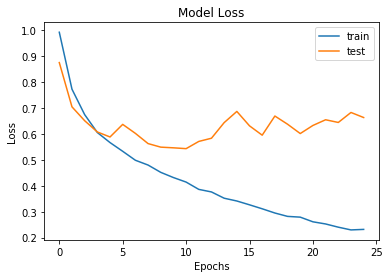

In [291]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

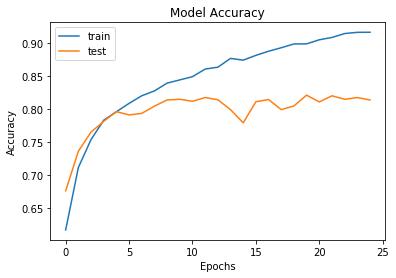

In [292]:
plt.plot(trained.history['accuracy'])
plt.plot(trained.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

##  Visualizing Predictons on the Validation Set

In [298]:
import numpy as np
from keras.preprocessing import image
test_image1 = image.load_img('111880_269359_bundle_archive/seg_pred/seg_pred/5.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
if result[0][0] == 1:
  prediction = 'Building'
elif result[0][1] == 1:
  prediction = 'Forest'
elif result[0][2] == 1:
  prediction = 'Glacier'
elif result[0][3] == 1:
  prediction = 'Mountain'
elif result[0][4] == 1:
  prediction = 'Sea'
elif result[0][5] == 1:
  prediction = 'Street'
else:
    print("Error")

In [297]:
result

array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [299]:
print(prediction)

Building
